In [62]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.special import eval_laguerre
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.special import zeta

In [2]:
data = np.load("RMFK_Results/mass-300-life-0.912.npz", allow_pickle = True)

In [3]:
eps = data['e'][-1]
f = data['fe'][-1]

In [4]:
cdf = nufit.cdf_faster(eps, f)

(0.0, 1400.0)

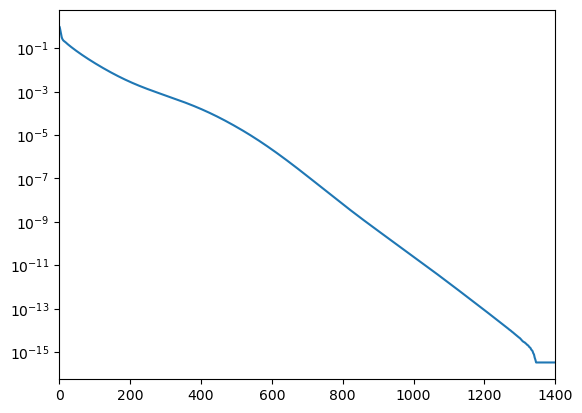

In [5]:
comp_cdf = (1-cdf)
plt.semilogy(eps, comp_cdf)
plt.xlim(0, 1400)

In [6]:
log_cdf = np.log(comp_cdf)
k = -(np.gradient(log_cdf, eps))

In [7]:
k_ind = np.where((comp_cdf <= (1e-2)))[0][0]
k_val = k[k_ind]
print(comp_cdf[k_ind])
print(k_val)

0.009796872638373588
0.021029186331034788


In [8]:
y = eps * k_val
def laguerre_fit(y, *w):
    total_sum = np.zeros(len(y))
    for i in range(len(w)):
        total_sum += w[i] * eval_laguerre(i, y)
    return total_sum * np.exp(-y)

In [9]:
w_guess = [0]
best_w, cov = curve_fit(laguerre_fit, y, comp_cdf, w_guess)  

In [10]:
fitted = laguerre_fit(y, *best_w)
print(best_w)

[0.45957752]


/var/folders/kl/cgktwqnn1f7_94dngb87_j8c0000gs/T/ipykernel_1740/445447494.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-19, 0)


(1e-19, 17.70074448870314)

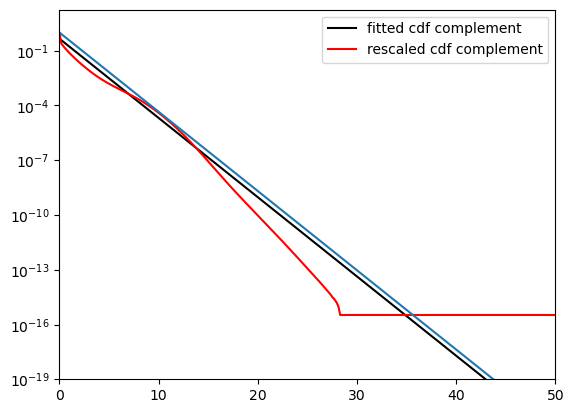

In [11]:
plt.semilogy(y, fitted, color = 'black', label = 'fitted cdf complement')
plt.semilogy(y, comp_cdf, color = 'red', label = 'rescaled cdf complement')
plt.plot(y, np.exp(-y))
plt.legend()
#plt.semilogy(eps, comp_cdf)
plt.xlim(0, 50)
plt.ylim(1e-19, 0)

(0.0, 10.0)

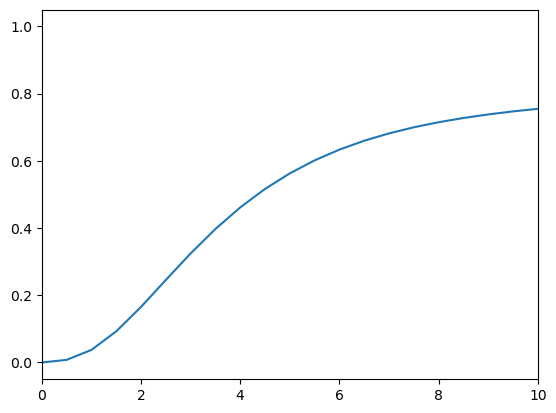

In [12]:
plt.plot(eps, cdf)
plt.xlim(0,10)

0.7616045750694088


(0.0, 10.0)

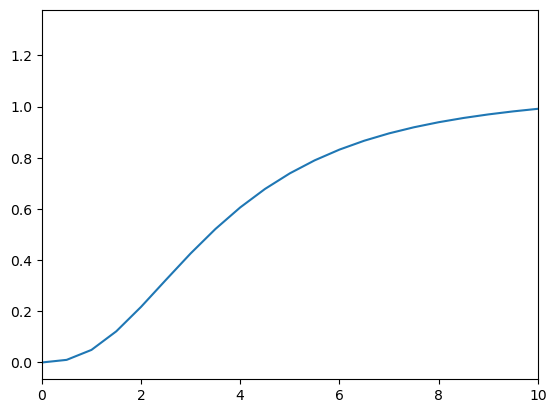

In [13]:
print(cdf[21])
plt.plot(eps, cdf/cdf[21])
plt.xlim(0,10)

In [14]:
def fermi_fit(eps, coeff, T, N):
    fermi_part = N / (np.exp(eps/T) + 1)
    g_part = np.exp(fun_g(eps, coeff))
    return fermi_part + g_part

In [15]:
w_guess2 = [1, 1] + [1]*5
best_w, cov = curve_fit(fermi_fit, eps, cdf, w_guess2) 

TypeError: fermi_fit() takes 4 positional arguments but 8 were given

In [17]:
def cdf_fit(x, T):
    def thermal(eps, T):
        return eps**2 / (np.exp(eps/T) + 1)
        
    num, err = quad(lambda eps: thermal(eps, T), 0, x)
    denom, err = quad(lambda eps: thermal(eps, T), 0, 5)

    return num/denom

In [18]:
T = 1.2
eps_cut = eps[:11]
cdf_cut = cdf[:11]
cdf_fit_model = [cdf_fit(x, T) for x in eps_cut]

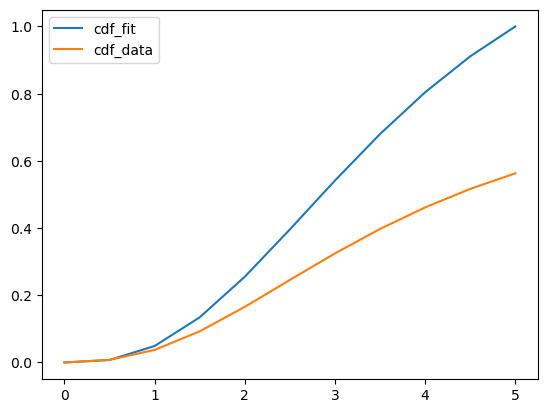

In [19]:
plt.plot(eps_cut, cdf_fit_model, label = 'cdf_fit')
plt.plot(eps_cut, cdf_cut, label = 'cdf_data')
plt.legend()

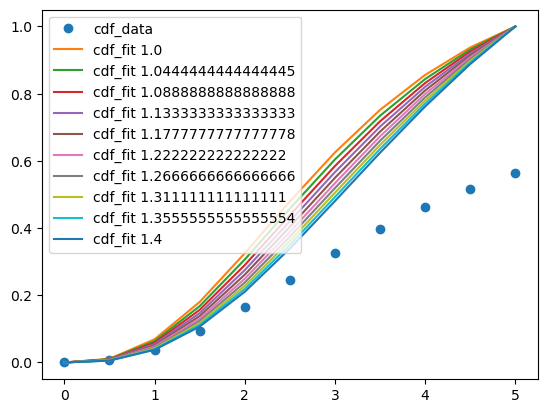

In [20]:
T_list = np.linspace(1, 1.4, 10)
plt.plot(eps_cut, cdf_cut, 'o', label = 'cdf_data')
for t in T_list:
    cdf_fit_model = [cdf_fit(x, t) for x in eps_cut]
    plt.plot(eps_cut, cdf_fit_model, label = f'cdf_fit {t}')
    plt.legend()

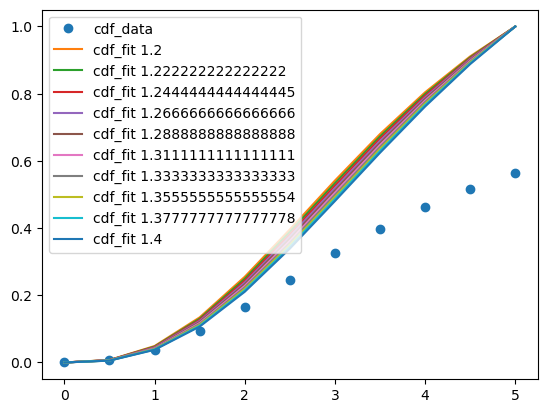

In [21]:
T_list2 = np.linspace(1.2, 1.4, 10)
plt.plot(eps_cut, cdf_cut, 'o', label = 'cdf_data')
for t in T_list2:
    cdf_fit_model = [cdf_fit(x, t) for x in eps_cut]
    plt.plot(eps_cut, cdf_fit_model, label = f'cdf_fit {t}')
    plt.legend()

In [22]:
T_vals = np.linspace(1.2, 1.4, 200)
ks = []
for t in T_vals:
    cdf_fit_model = [cdf_fit(x, t) for x in eps_cut]
    ks_val  = np.max(np.abs(cdf_fit_model - cdf_cut))
    ks.append(ks_val)

In [23]:
best_t = T_vals[np.argmin(ks)]

In [24]:
print(best_t)

1.2


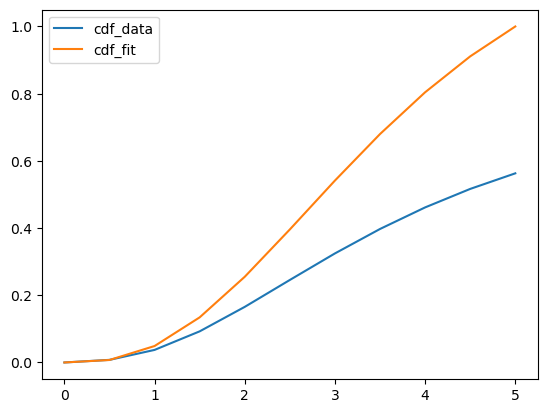

In [25]:
cdf_best = [cdf_fit(x, best_t) for x in eps_cut]
plt.plot(eps_cut, cdf_cut, label = 'cdf_data')
plt.plot(eps_cut, cdf_best, label = f'cdf_fit')
plt.legend()

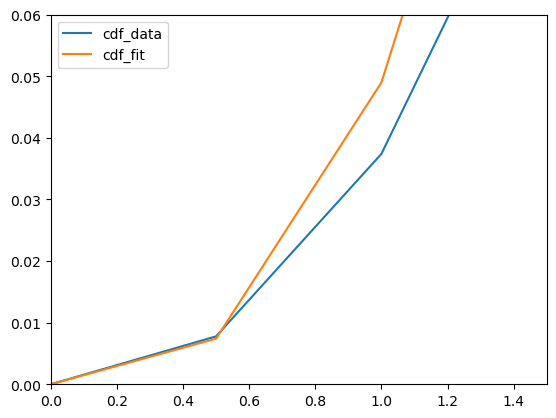

In [26]:
cdf_best = [cdf_fit(x, best_t) for x in eps_cut]
plt.plot(eps_cut, cdf_cut, label = 'cdf_data')
plt.plot(eps_cut, cdf_best, label = f'cdf_fit')
plt.xlim(0,1.5)
plt.ylim(0, 0.06)
plt.legend()

In [27]:
data_short = np.load("RMFK_Results/mass-300-life-0.010.npz", allow_pickle = True)

In [28]:
eps_short = data_short['e'][-1]
f_short = data_short['fe'][-1]

In [29]:
cdf_short = nufit.cdf_faster(eps_short, f_short)

In [30]:
eps_cut2 = eps_short[:11]
cdf_cut2 = cdf_short[:11]
cdf_fit_model2 = [cdf_fit(x, T) for x in eps_cut2]

In [31]:
T_vals2 = np.linspace(1.2,2, 100)
ks2 = []
for t in T_vals2:
    cdf_fit_model2 = [cdf_fit(x, t) for x in eps_cut2]
    ks_val  = np.max(np.abs(cdf_fit_model2 - cdf_cut2))
    ks2.append(ks_val)

In [32]:
best_t2 = T_vals2[np.argmin(ks2)]

In [33]:
print(best_t2)

1.2


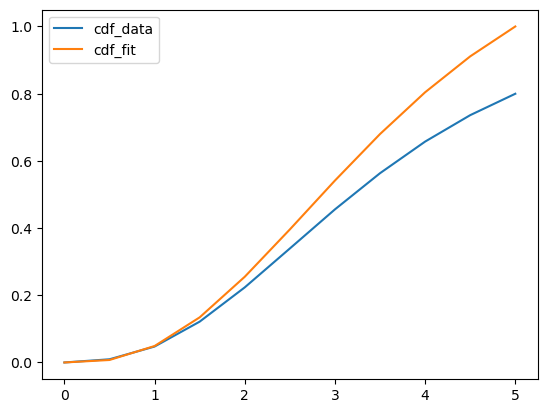

In [34]:
cdf_best2 = [cdf_fit(x, best_t2) for x in eps_cut2]
plt.plot(eps_cut2, cdf_cut2, label = 'cdf_data')
plt.plot(eps_cut2, cdf_best2, label = 'cdf_fit')
plt.legend()

In [40]:
def fun_g(eps_cut):
    result = (1/6)*eps_cut*np.exp(-eps_cut)
    return result

integral, err = quad(lambda eps_cut:eps_cut**2*fun_g(eps_cut),0,np.inf)

In [85]:
zeta3 = zeta(3)
b_prime = 2
def norm(T, b_prime):
    result = (T**3 * (3/2) * zeta3) + b_prime
    return result

def cdf_fit_nont(x, T, b_prime):

    def thermal(eps_cut, T):
        return (eps_cut**2 / np.exp(eps_cut/T) + 1)
        
    num, err = quad(lambda eps_cut: thermal(eps_cut, T), 0, x)
    denom = norm(T, b_prime)

    return num/denom

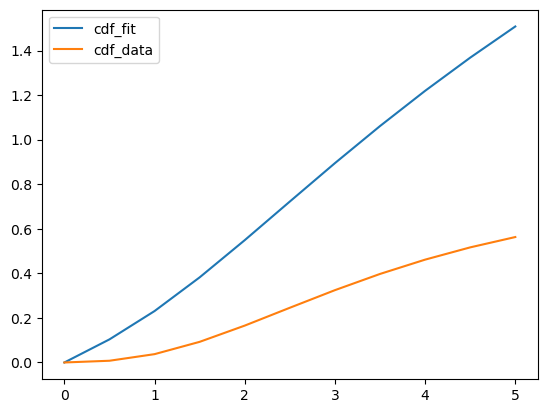

In [86]:
cdf_fit_model_nont = [cdf_fit_nont(x, T, b_prime) for x in eps_cut]
plt.plot(eps_cut, cdf_fit_model_nont, label = 'cdf_fit')
plt.plot(eps_cut, cdf_cut, label = 'cdf_data')
plt.legend()

In [101]:
T_vals3 = np.linspace(1.2, 2, 200)
bprime_vals = np.linspace(1, 20, 200)
ks_nont = np.zeros((len(T_vals3), len(bprime_vals)))

for i, t in enumerate(T_vals3):
    for j, b in enumerate(bprime_vals):
        cdf_fit_model_nont2 = [cdf_fit_nont(x, t, b) for x in eps_cut]
        ks_val  = np.max(np.abs(cdf_fit_model_nont2 - cdf_cut))
        ks_nont[i, j] = ks_val

In [102]:
min_index = np.unravel_index(np.argmin(ks_nont), ks_nont.shape)
best_t_nont = T_vals3[min_index[0]]
best_b = bprime_vals[min_index[1]]

In [103]:
print(best_t_nont)
print(best_b)

1.8432160804020101
8.065326633165828


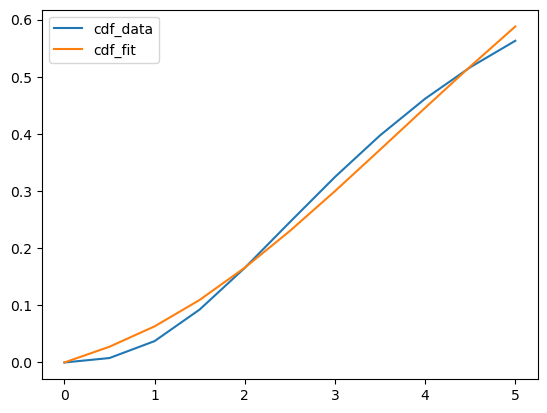

In [106]:
cdf_best_nont = [cdf_fit_nont(x, best_t_nont, best_b) for x in eps_cut]
plt.plot(eps_cut, cdf_cut, label = 'cdf_data')
plt.plot(eps_cut, cdf_best_nont, label = 'cdf_fit')
plt.legend()

In [107]:
cdf_fit_model_short = [cdf_fit_nont(x, T, b_prime) for x in eps_cut2]

In [108]:
ks_nont_short = np.zeros((len(T_vals3), len(bprime_vals)))

for i, t in enumerate(T_vals3):
    for j, b in enumerate(bprime_vals):
        cdf_fit_model_nont2 = [cdf_fit_nont(x, t, b) for x in eps_cut2]
        ks_val  = np.max(np.abs(cdf_fit_model_nont2 - cdf_cut))
        ks_nont_short[i, j] = ks_val

In [111]:
min_index_sh = np.unravel_index(np.argmin(ks_nont_short), ks_nont.shape)
best_t_sh = T_vals3[min_index_sh[0]]
best_b_sh= bprime_vals[min_index_sh[1]]

In [112]:
print(best_t_sh)
print(best_b_sh)

1.8432160804020101
8.065326633165828


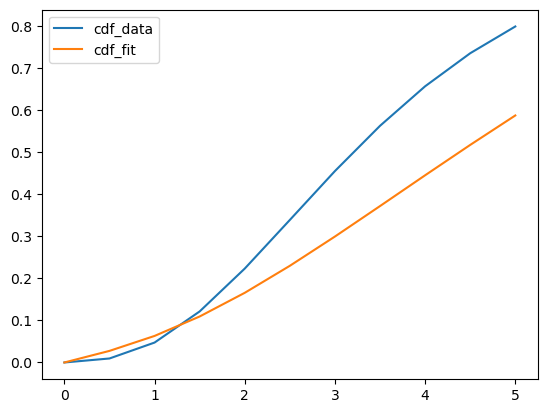

In [113]:
cdf_best_nont_sh = [cdf_fit_nont(x, best_t_sh, best_b_sh) for x in eps_cut2]
plt.plot(eps_cut2, cdf_cut2, label = 'cdf_data')
plt.plot(eps_cut2, cdf_best_nont_sh, label = 'cdf_fit')
plt.legend()

In [118]:
def find_ks_nont(eps, cdf_data, T_values, B_values):
    ks = np.zeros((len(T_values), len(B_values)))
                  
    for i, t in enumerate(T_values):
        for j, b in enumerate(B_values):
            cdf_fit_model = [cdf_fit_nont(x, t, b) for x in eps]
            ks_val  = np.max(np.abs(cdf_fit_model - cdf_data))
            ks[i, j] = ks

    min_index = np.unravel_index(np.argmin(ks), ks.shape)

    return min_index

def find_ks_t(eps, cdf_data, T_values):
    ks = []
    for t in T_valsues:
        cdf_fit_model = [cdf_fit(x, t) for x in eps]
        ks_val  = np.max(np.abs(cdf_fit_model - cdf_data))
        ks.append(ks_val)
    best_t = T_values[np.argmin(ks)]
    
    return best_t